[View in Colaboratory](https://colab.research.google.com/github/freesemt/stewart-acid-base-model/blob/master/notebooks/pH_stewart.ipynb)

pH= 7.397785591087435


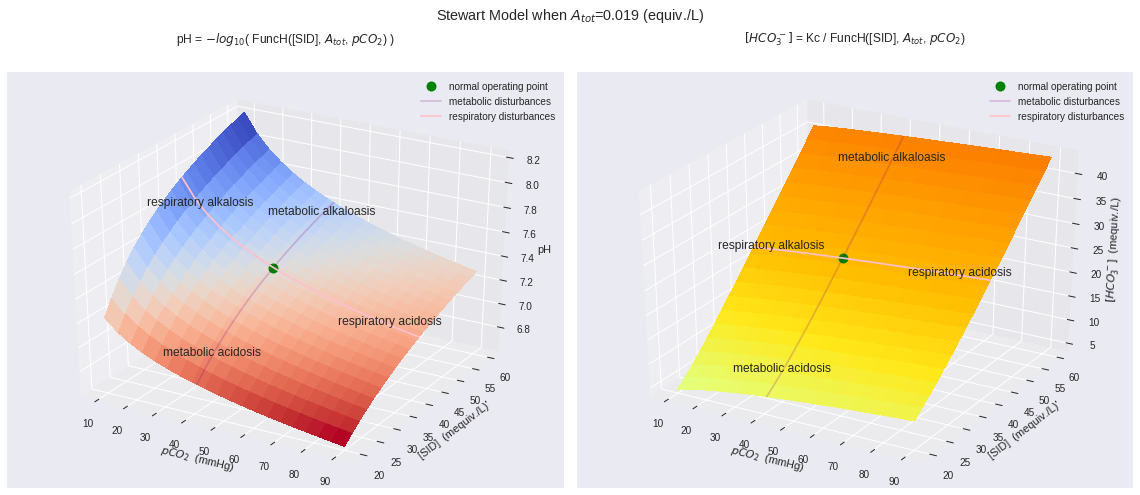

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
import sys
sys.path.append('local_modules/OurUtils')
from OurColormap import reverse_colourmap
from StewartModel import Fh4, Kc

import seaborn
seaborn.set()

MILI = 1e-3
KILO = 1e3
Atot = 0.019
# Atot = 0
pCO2 = 41
SID = 42

cmap_ph = reverse_colourmap(cm.coolwarm)
cmap_hc = plt.get_cmap( 'Wistia' )

fig = plt.figure( figsize=(16, 7) )
fig.suptitle( "Stewart Model when $A_{tot}$=%.2g (equiv./L)" % (Atot) )

ax  = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax.set_title( "pH = $-log_{10}$( FuncH([SID], $A_{tot}$, $pCO_2$) )", y=1.15 )
ax.set_xlabel( "$pCO_2$  (mmHg)" )
ax.set_ylabel( "[SID]  (mequiv./L)'" )
ax.set_zlabel( "pH" )

ax2.set_title( "$[HCO_3^-]$ = Kc / FuncH([SID], $A_{tot}$, $pCO_2$)", y=1.15 )
ax2.set_xlabel( "$pCO_2$  (mmHg)" )
ax2.set_ylabel( "[SID]  (mequiv./L)'" )
ax2.set_zlabel( "$[HCO_3^-]$  (mequiv./L)" )

x = np.linspace(10, 90, 20)
y = np.linspace(20, 60, 20)

text_params = [ [ 'metabolic acidosis',     pCO2,   SID*0.2 + y[0]*0.8],
                [ 'metabolic alkaloasis',   pCO2,   SID*0.2 + y[-1]*0.8],
                [ 'respiratory acidosis',   pCO2*0.2 + x[-1]*0.8,   SID],
                [ 'respiratory alkalosis',  pCO2*0.2 + x[0]*0.8,    SID]
                ]

X, Y = np.meshgrid(x, y)
Z = Fh4( Y*MILI, Atot, X )
pZ = -np.log10( Z )

surf = ax.plot_surface(X, Y, pZ, cmap=cmap_ph,
                       linewidth=0, antialiased=False)

W = Kc*x/Z
surf2= ax2.plot_surface(X, Y, W*KILO, cmap=cmap_hc,
                       linewidth=0, antialiased=False)

H = Fh4( SID*MILI, Atot, pCO2 )
pH = -np.log10( H )
print( 'pH=', pH )
ax.plot( [pCO2], [SID], [pH], 'o', color='green', markersize=10, label='normal operating point' )
HCO3 = Kc*pCO2/H*KILO
ax2.plot( [pCO2], [SID], [HCO3], 'o', color='green', markersize=10, label='normal operating point' )

zm_ = Fh4( y*MILI, Atot, pCO2 )
zm = -np.log10( zm_ )
x_ = np.ones(len(x))*pCO2
ax.plot( x_, y, zm, label='metabolic disturbances', color='purple', alpha=0.2 )
wm = Kc*pCO2/zm_*KILO
ax2.plot( x_, y, wm, label='metabolic disturbances', color='purple', alpha=0.2 )

zr_ = Fh4( SID*MILI, Atot, x )
zr = -np.log10( zr_ )
y_ = np.ones(len(y))*SID
ax.plot( x, y_, zr, label='respiratory disturbances', color='pink' )

wr = Kc*x/zr_*KILO
ax2.plot( x, y_, wr, label='respiratory disturbances', color='pink' )

for tt, tx, ty in text_params:
    th = Fh4( ty*MILI, Atot, tx )
    tz = -np.log10( th )
    ax.text( tx, ty, tz, tt, ha='center' )
    tw = Kc*tx/th*KILO
    ax2.text( tx, ty, tw, tt, ha='center' )

ax.legend()
ax2.legend()
fig.tight_layout()
fig.subplots_adjust( top=0.85 )

plt.show()
